In [1]:
from keras.applications import VGG16,imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import Model
import numpy as np
from IPython.display import Image,display
import glob
import os


Using TensorFlow backend.


In [2]:
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

In [3]:
model = VGG16(weights='imagenet')

In [4]:
def predictLabel(file):
    image = load_img(file,target_size=inputShape)
    image = img_to_array(image)
    image = np.expand_dims(image,axis=0)

    image = preprocess(image)
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)
    display(Image(filename=file,width=inputShape[0],height=inputShape[1]))
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        # other way
        print(f'{i+1}. {label}: {prob*100:.2f}%')

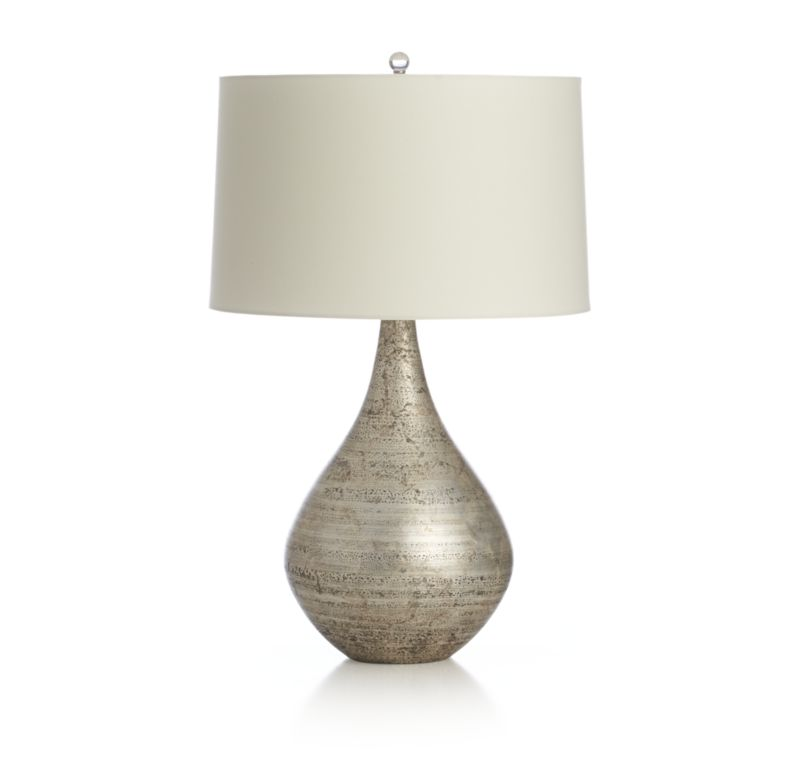

1. table_lamp: 75.61%
2. lampshade: 21.07%
3. spotlight: 0.60%
4. vase: 0.38%
5. hook: 0.17%


In [32]:
predictLabel('./images/lamp3.jpeg')

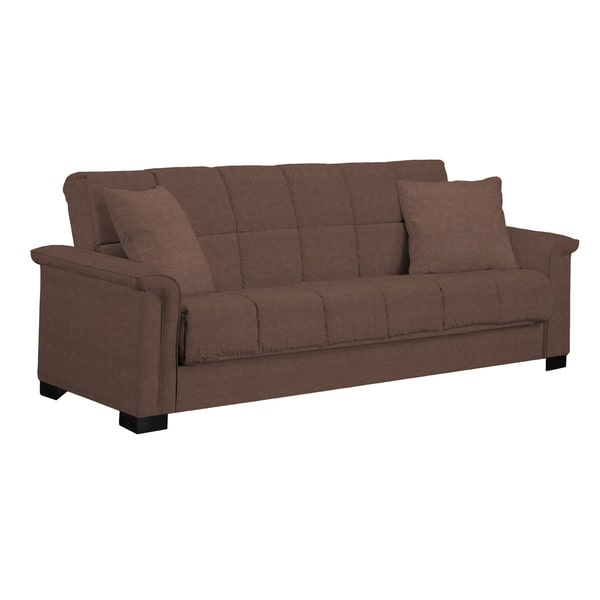

1. studio_couch: 99.57%
2. park_bench: 0.06%
3. pedestal: 0.06%
4. stretcher: 0.04%
5. cradle: 0.03%


In [31]:
predictLabel('./images/couch2.jpeg')

In [53]:
def get_features(model,file):
    image = load_img(file,target_size=inputShape)
    image = img_to_array(image)
    image = np.expand_dims(image,axis=0)

    image = preprocess(image)
    feature = model.predict(image)
    return np.squeeze(feature)

In [8]:
def check_images(file):
    try:
        image = load_img(file,target_size=inputShape)
    except:
        print(f'Removing {file}')
        os.remove(file)

In [9]:
couch_images = glob.glob('./Data/OpenImages/couch/*.jpg')
for file in couch_images:
    check_images(file)
couch_images = glob.glob('./Data/OpenImages/couch/*.jpg')
print(f'{len(couch_images)} images available')

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 36962304 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37486592 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin

639 images available


In [62]:
from keras.layers import Dense
model = VGG16(weights='imagenet')

FC6_linear = Model(inputs = model.input,
                   output = Dense(4096, activation=None, name='FC6')(model.get_layer('fc1').input))
FC7_linear = Model(inputs = model.input,
                   output = Dense(4096, activation=None, name='FC7')(model.get_layer('fc2').input))
FC8_linear = Model(inputs = model.input,
                   output = Dense(1000, activation=None, name='FC8')(model.get_layer('predictions').input))

/Users/nsteins/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("FC...)`
  """
/Users/nsteins/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("FC...)`
  import sys
/Users/nsteins/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("FC...)`
  if __name__ == '__main__':


In [11]:
fc6_model = Model(inputs=model.input,outputs=model.get_layer('fc1').output)

couch_feature_matrix = []

for file in couch_images:
    couch_feature_matrix.append(get_features(feature_model,file))

couch_feature_matrix = np.array(couch_feature_matrix)

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 36962304 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37486592 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin

In [12]:
def find_match(file,feature_matrix,image_list):
    img_feature = get_features(feature_model,file)
    L2 = np.sum((feature_matrix-img_feature)**2,axis=1)
    match = np.argmin(L2)

    print(f'distance: {np.sqrt(np.min(L2))}')
    display(Image(filename=file,width=inputShape[0],height=inputShape[1]))
    display(Image(filename=image_list[match],width=inputShape[0],height=inputShape[1]))

distance: 230.14195251464844


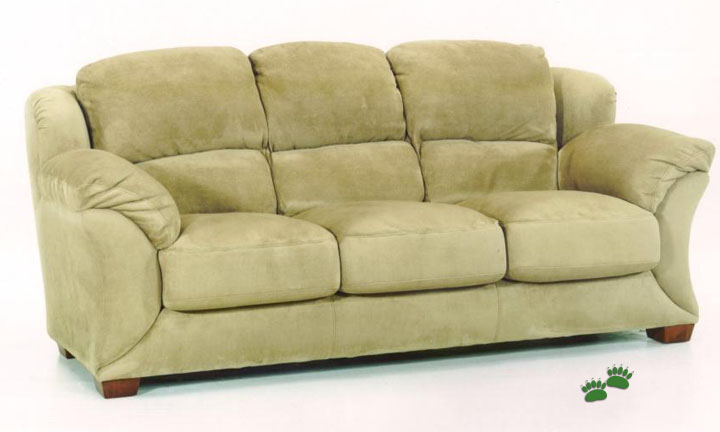

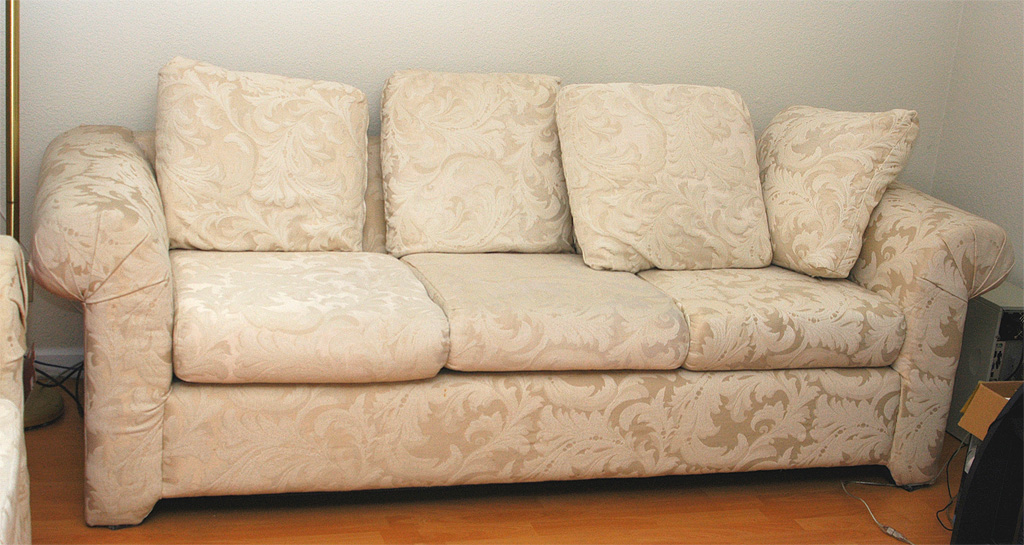

In [15]:
find_match('./images/couch1.jpeg',couch_feature_matrix,couch_images)

distance: 285.11767578125


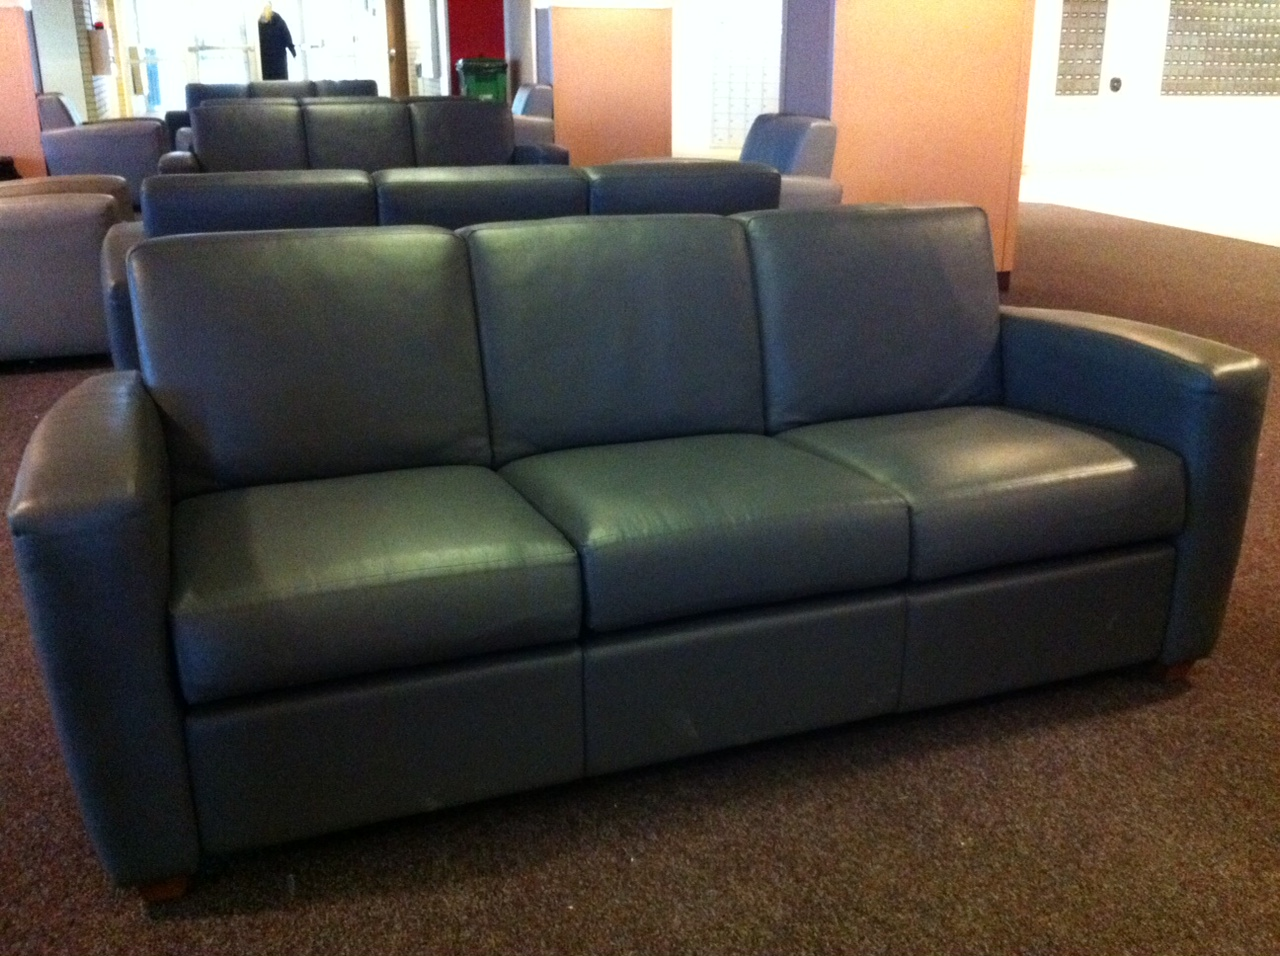

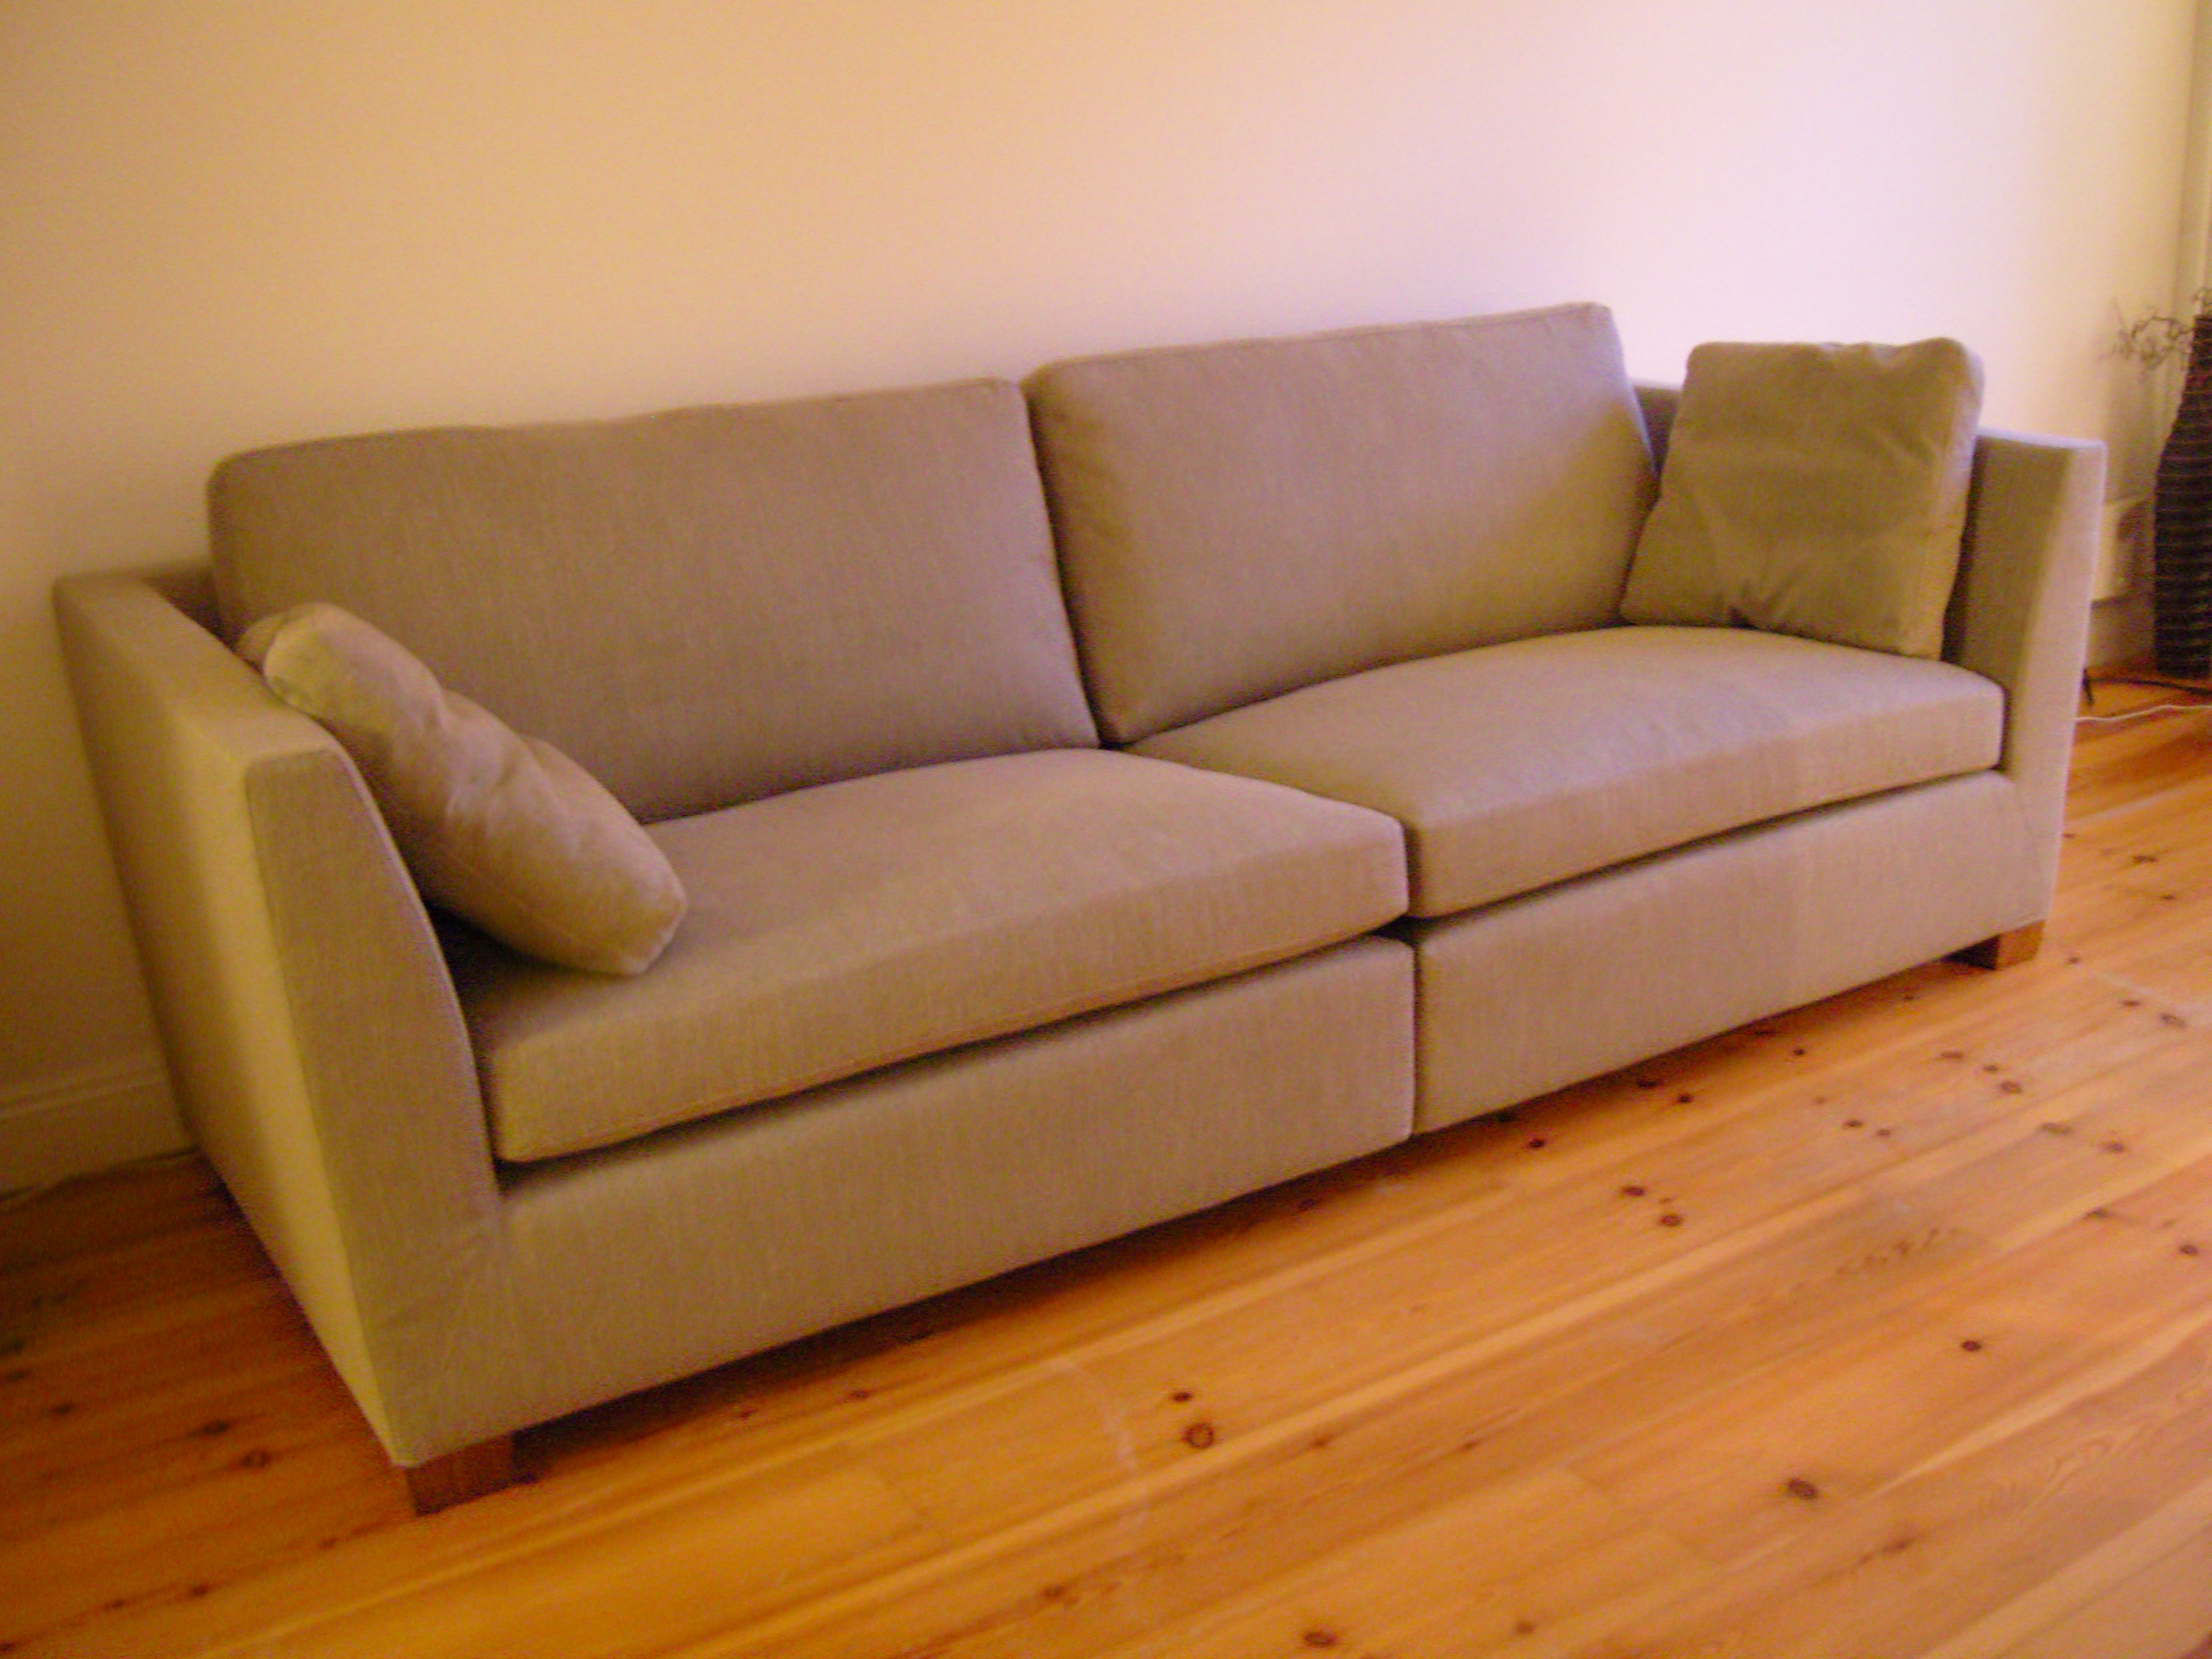

In [16]:
find_match('./images/couch4.jpeg',couch_feature_matrix,couch_images)

In [56]:
light_images = glob.glob('./Data/OpenImages/light_fixture/*.jpg')
for file in light_images:
    check_images(file)
light_images = glob.glob('./Data/OpenImages/light_fixture/*.jpg')
print(f'{len(light_images)} images available')

Removing ./Data/OpenImages/light_fixture/10024750913_2ca14a8e66_o.jpg
Removing ./Data/OpenImages/light_fixture/10242752933_2663e22706_o.jpg
Removing ./Data/OpenImages/light_fixture/10366175026_071a13fd4d_o.jpg
Removing ./Data/OpenImages/light_fixture/103757683_c6bbed295b_o.jpg
Removing ./Data/OpenImages/light_fixture/10495417_f6777521d5_o.jpg
Removing ./Data/OpenImages/light_fixture/10531065546_6955332056_o.jpg
Removing ./Data/OpenImages/light_fixture/10610545756_543f2452fd_o.jpg
Removing ./Data/OpenImages/light_fixture/10692888853_4f118925f5_o.jpg
Removing ./Data/OpenImages/light_fixture/10929355095_f724a6d2c2_o.jpg
Removing ./Data/OpenImages/light_fixture/11006839183_29f80f54d7_o.jpg
Removing ./Data/OpenImages/light_fixture/11165847476_dcf8e31b20_o.jpg
Removing ./Data/OpenImages/light_fixture/113166980_035ef3f8c0_o.jpg
Removing ./Data/OpenImages/light_fixture/11456506254_66e0ce12e5_o.jpg
Removing ./Data/OpenImages/light_fixture/116150570_6b70a1b087_o.jpg
Removing ./Data/OpenImages/li

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3263561744 bytes but only got 0. Skipping tag 8
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4568514560 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2284978176 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19600506880 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/Ti

Removing ./Data/OpenImages/light_fixture/16159486064_c6c8d811be_o.jpg
Removing ./Data/OpenImages/light_fixture/16168332812_d5a33e91f0_o.jpg
Removing ./Data/OpenImages/light_fixture/16184152510_3d9f277e26_o.jpg
Removing ./Data/OpenImages/light_fixture/16190310626_b871bc290b_o.jpg
Removing ./Data/OpenImages/light_fixture/16213773663_ac763d01e7_o.jpg
Removing ./Data/OpenImages/light_fixture/16236880847_15105038dd_o.jpg
Removing ./Data/OpenImages/light_fixture/16245917891_563e1337af_o.jpg
Removing ./Data/OpenImages/light_fixture/16271031853_56ec5c45fb_o.jpg
Removing ./Data/OpenImages/light_fixture/16477667408_be491149b8_o.jpg
Removing ./Data/OpenImages/light_fixture/165019398_1e66ab679c_o.jpg
Removing ./Data/OpenImages/light_fixture/16507651951_94f9408c8c_o.jpg
Removing ./Data/OpenImages/light_fixture/16588975782_0e4a53448d_o.jpg
Removing ./Data/OpenImages/light_fixture/166159937_94b9e3042e_o.jpg
Removing ./Data/OpenImages/light_fixture/166257175_f4e938f4d5_o.jpg
Removing ./Data/OpenImages

Removing ./Data/OpenImages/light_fixture/3310043669_12ccfe3f17_o.jpg
Removing ./Data/OpenImages/light_fixture/3318429057_82e2571972_o.jpg
Removing ./Data/OpenImages/light_fixture/3327497216_a5f0b763fb_o.jpg
Removing ./Data/OpenImages/light_fixture/339993812_56a2a6af57_o.jpg
Removing ./Data/OpenImages/light_fixture/3407040075_e93b8d0fb6_o.jpg
Removing ./Data/OpenImages/light_fixture/3413874000_c945802f85_o.jpg
Removing ./Data/OpenImages/light_fixture/3417108286_dc30f484b4_o.jpg
Removing ./Data/OpenImages/light_fixture/3428521695_3c2cd3abb5_o.jpg
Removing ./Data/OpenImages/light_fixture/3455489113_2b2e08e369_o.jpg
Removing ./Data/OpenImages/light_fixture/3463257308_f66eba4717_o.jpg
Removing ./Data/OpenImages/light_fixture/34797521_700f6ba55b_o.jpg
Removing ./Data/OpenImages/light_fixture/3484560345_94c7163208_o.jpg
Removing ./Data/OpenImages/light_fixture/3513341640_ef5ebd4eae_o.jpg
Removing ./Data/OpenImages/light_fixture/354072724_3f8bea35f7_o.jpg
Removing ./Data/OpenImages/light_fixtu

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 5. Skipping tag 272
  "Skipping tag %s" % (size, len(data), tag))


Removing ./Data/OpenImages/light_fixture/4162073880_10c3d3033f_o.jpg
Removing ./Data/OpenImages/light_fixture/4169882423_b31e177af8_o.jpg
Removing ./Data/OpenImages/light_fixture/417489730_77a974866e_o.jpg
Removing ./Data/OpenImages/light_fixture/4195105495_a914c13bbc_o.jpg
Removing ./Data/OpenImages/light_fixture/420610304_c850bf9985_o.jpg
Removing ./Data/OpenImages/light_fixture/4212686275_f350f89ffa_o.jpg
Removing ./Data/OpenImages/light_fixture/4218598816_a5eee9fe34_o.jpg
Removing ./Data/OpenImages/light_fixture/4234210106_649e05ddb0_o.jpg
Removing ./Data/OpenImages/light_fixture/4238585172_4fba4694d7_o.jpg
Removing ./Data/OpenImages/light_fixture/4252913256_d7bd68624b_o.jpg
Removing ./Data/OpenImages/light_fixture/4258644437_982189cde3_o.jpg
Removing ./Data/OpenImages/light_fixture/4280450910_94abb40a6e_o.jpg
Removing ./Data/OpenImages/light_fixture/4283448427_88dc50c33b_o.jpg
Removing ./Data/OpenImages/light_fixture/4302345286_962c5629f5_o.jpg
Removing ./Data/OpenImages/light_fix

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 51
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31197188 bytes but only got 0. Skipping tag 1029
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 3. 
  warnings.warn(str(msg))


Removing ./Data/OpenImages/light_fixture/5496319306_f30b65db7a_o.jpg
Removing ./Data/OpenImages/light_fixture/5497376676_4d4c82354f_o.jpg
Removing ./Data/OpenImages/light_fixture/5498499955_5a6565e005_o.jpg
Removing ./Data/OpenImages/light_fixture/55117862_3852a094ad_o.jpg
Removing ./Data/OpenImages/light_fixture/5518759208_cf9720ee63_o.jpg
Removing ./Data/OpenImages/light_fixture/5519579526_6fed5f3928_o.jpg
Removing ./Data/OpenImages/light_fixture/5542087233_8dab7d5059_o.jpg
Removing ./Data/OpenImages/light_fixture/5567843723_f59de850aa_o.jpg
Removing ./Data/OpenImages/light_fixture/5585055430_f5d8235b24_o.jpg
Removing ./Data/OpenImages/light_fixture/5586049980_30f92f3480_o.jpg
Removing ./Data/OpenImages/light_fixture/5594877811_fb92a14696_o.jpg
Removing ./Data/OpenImages/light_fixture/5601987387_cc0dd91861_o.jpg
Removing ./Data/OpenImages/light_fixture/5607368687_71a70c3a56_o.jpg
Removing ./Data/OpenImages/light_fixture/562116408_7d83410aa5_o.jpg
Removing ./Data/OpenImages/light_fixt

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


Removing ./Data/OpenImages/light_fixture/7826666706_c3727d1e2e_o.jpg
Removing ./Data/OpenImages/light_fixture/7830321628_4118beb2f9_o.jpg
Removing ./Data/OpenImages/light_fixture/7934638720_26c252ded9_o.jpg
Removing ./Data/OpenImages/light_fixture/7988018026_20c5737c4b_o.jpg


/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262144 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))


Removing ./Data/OpenImages/light_fixture/8053141552_d19d6d86f3_o.jpg
Removing ./Data/OpenImages/light_fixture/8074974294_bf082afaa0_o.jpg
Removing ./Data/OpenImages/light_fixture/8083049494_f011074185_o.jpg
Removing ./Data/OpenImages/light_fixture/8099520596_bcb95c374b_o.jpg
Removing ./Data/OpenImages/light_fixture/8148030350_578e2130de_o.jpg
Removing ./Data/OpenImages/light_fixture/8154053006_4466c59b9d_o.jpg
Removing ./Data/OpenImages/light_fixture/8167139934_7ac2f32fc9_o.jpg
Removing ./Data/OpenImages/light_fixture/8168897658_0d4e9b859f_o.jpg
Removing ./Data/OpenImages/light_fixture/8210554852_e9e3c84127_o.jpg
Removing ./Data/OpenImages/light_fixture/8238625443_fafbc21c33_o.jpg
Removing ./Data/OpenImages/light_fixture/8259954702_a53e951748_o.jpg
Removing ./Data/OpenImages/light_fixture/8288324134_10fd8c1377_o.jpg
Removing ./Data/OpenImages/light_fixture/8299250749_e7df919fee_o.jpg
Removing ./Data/OpenImages/light_fixture/8359307884_19ba7e2b76_o.jpg
Removing ./Data/OpenImages/light_f

In [57]:
light_feature_matrix = []

for file in light_images:
    light_feature_matrix.append(get_features(feature_model,file))

light_feature_matrix = np.array(light_feature_matrix)

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3263561744 bytes but only got 0. Skipping tag 8
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4568514560 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2284978176 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19600506880 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/Ti

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 5. Skipping tag 272
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 51
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31197188 bytes but only got 0. Skipping tag 1029
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 3. 
  warnings.warn(str(msg))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expect

distance: 292.7344665527344


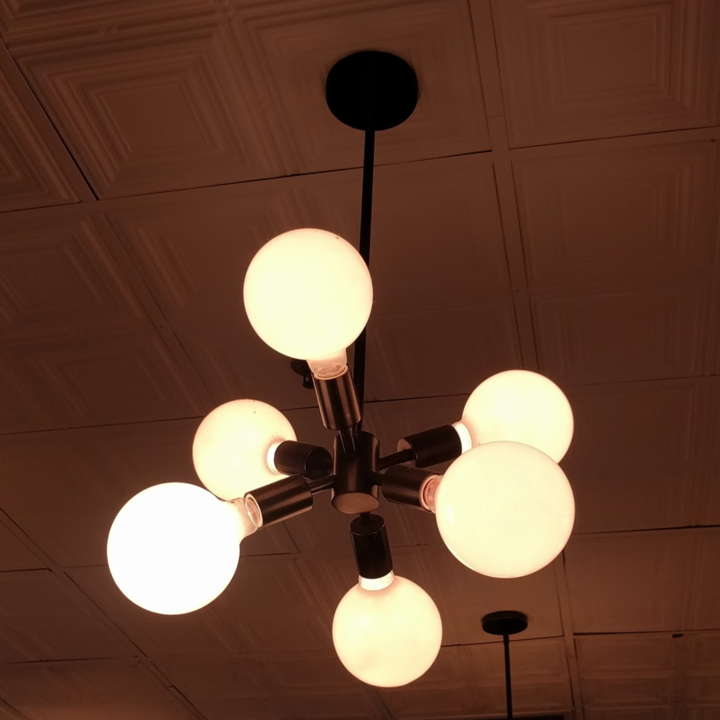

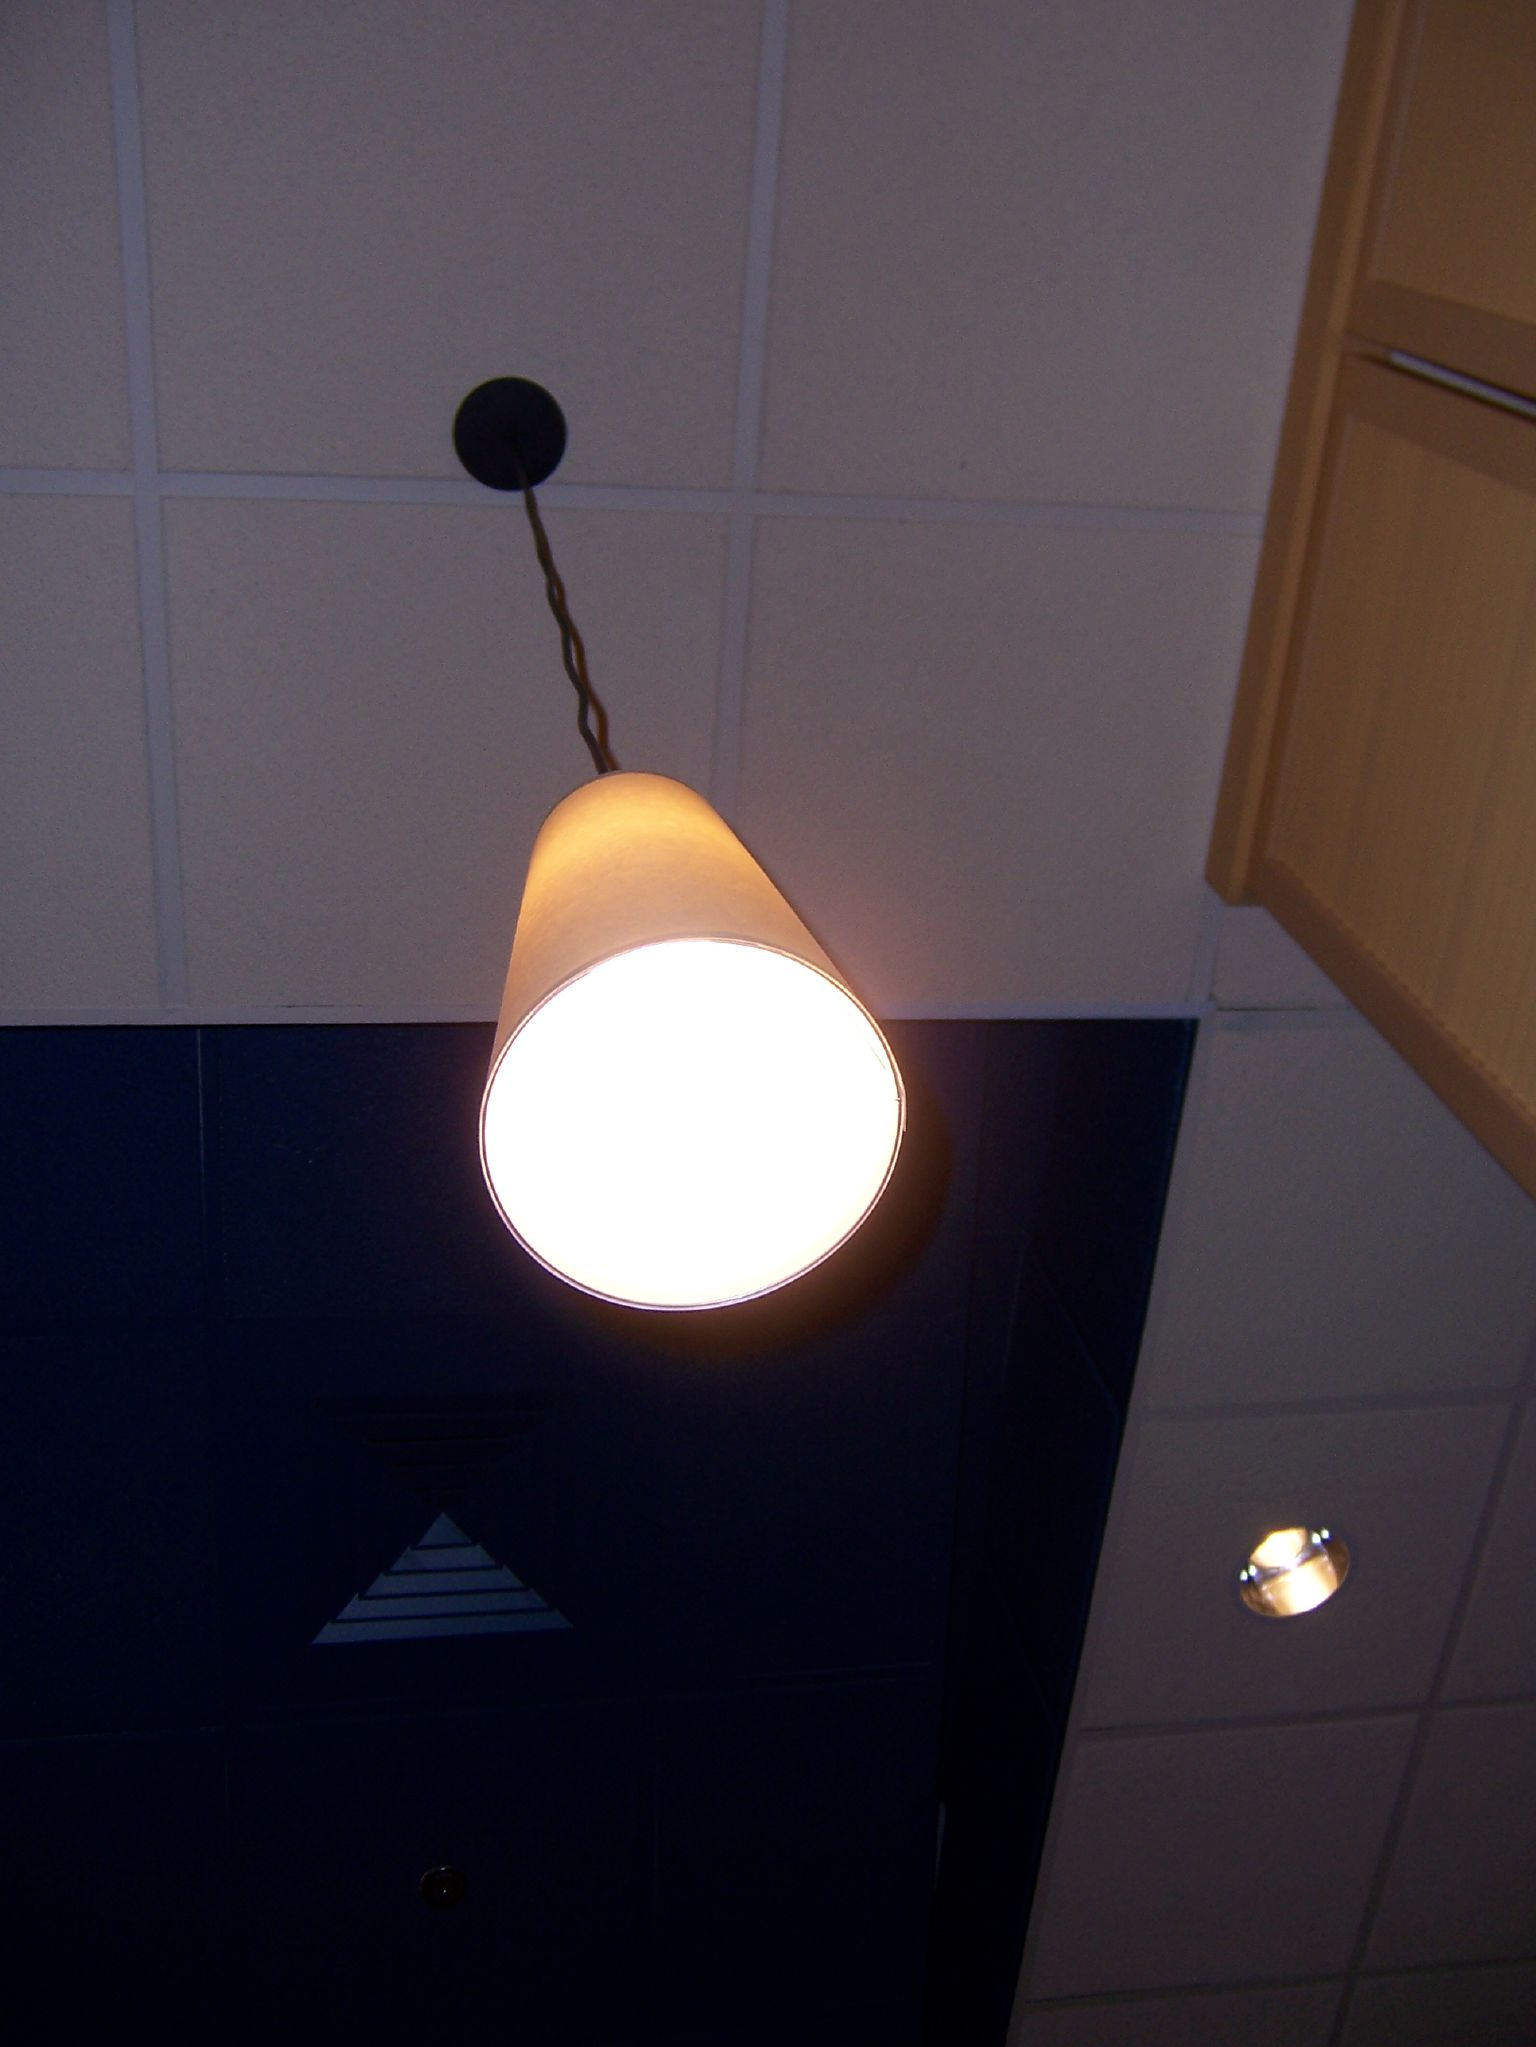

In [58]:
find_match('./images/light_chris.png',light_feature_matrix,light_images)

In [17]:
from sklearn.manifold import TSNE

In [18]:
model = TSNE()
embed = model.fit_transform(couch_feature_matrix)

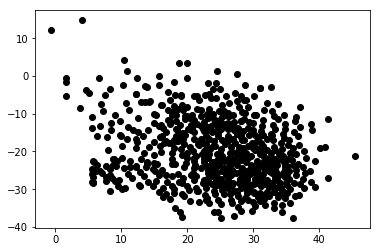

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(embed[:,0],embed[:,1],'ko')

In [55]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create figure
fig = plt.figure(figsize=(20,20),dpi=300)
ax = fig.add_subplot(111)

# Plots an image at each x and y location. 
def plotImage(x, y, image):
    im = OffsetImage(load_img(image,target_size=inputShape), zoom=0.15)
    ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
    ax.add_artist(ab)

for i in range(400):
    plotImage(embed[i,0],embed[i,1],couch_images[i])

ax.set_ylim(-40,0)
ax.set_xlim(0,40)

plt.savefig('output/couch_tsne.png')

/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 36962304 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37486592 bytes but only got 0. Skipping tag 5
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/Users/nsteins/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin

In [59]:
model = TSNE()
light_embed = model.fit_transform(light_feature_matrix)

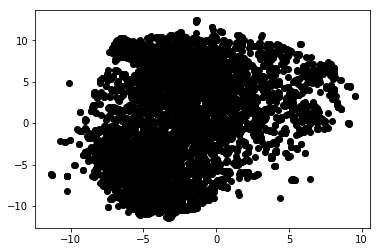

In [62]:
plt.plot(light_embed[:,0],light_embed[:,1],'ko')

In [63]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create figure
fig = plt.figure(figsize=(20,20),dpi=300)
ax = fig.add_subplot(111)


for i in range(400):
    plotImage(light_embed[i,0],light_embed[i,1],light_images[i])

ax.set_ylim(-10,10)
ax.set_xlim(-10,10)

plt.savefig('output/light_tsne.png')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [74]:
def gen_pairs(N,feature_matrix,images):
    img_index = np.random.randint(len(images),size=N)
    for i in img_index:
        img_feature = feature_matrix[i,:]
        L2 = np.sum((feature_matrix-img_feature)**2,axis=1)
        match = np.argsort(L2)[1]

        print(f'distance: {np.sqrt(L2[match])}')
        display(Image(filename=images[i],width=inputShape[0],height=inputShape[1]))
        display(Image(filename=images[match],width=inputShape[0],height=inputShape[1]))

distance: 205.2115936279297


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


distance: 222.7159881591797


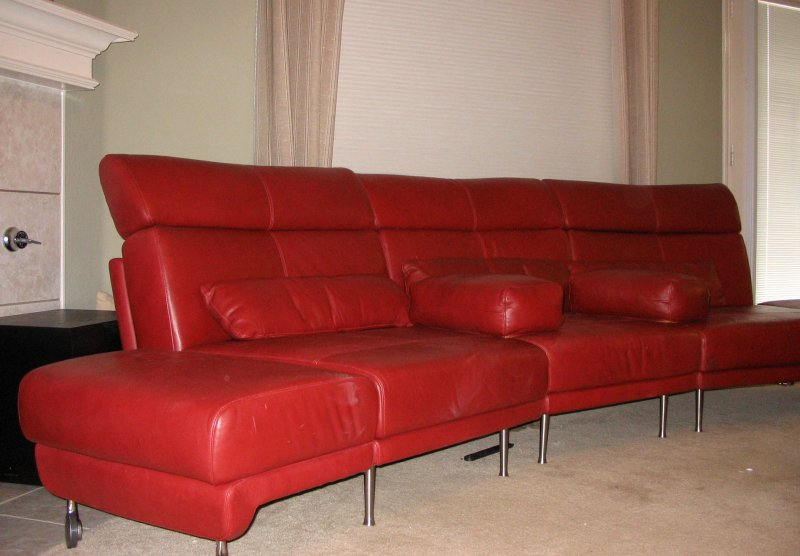

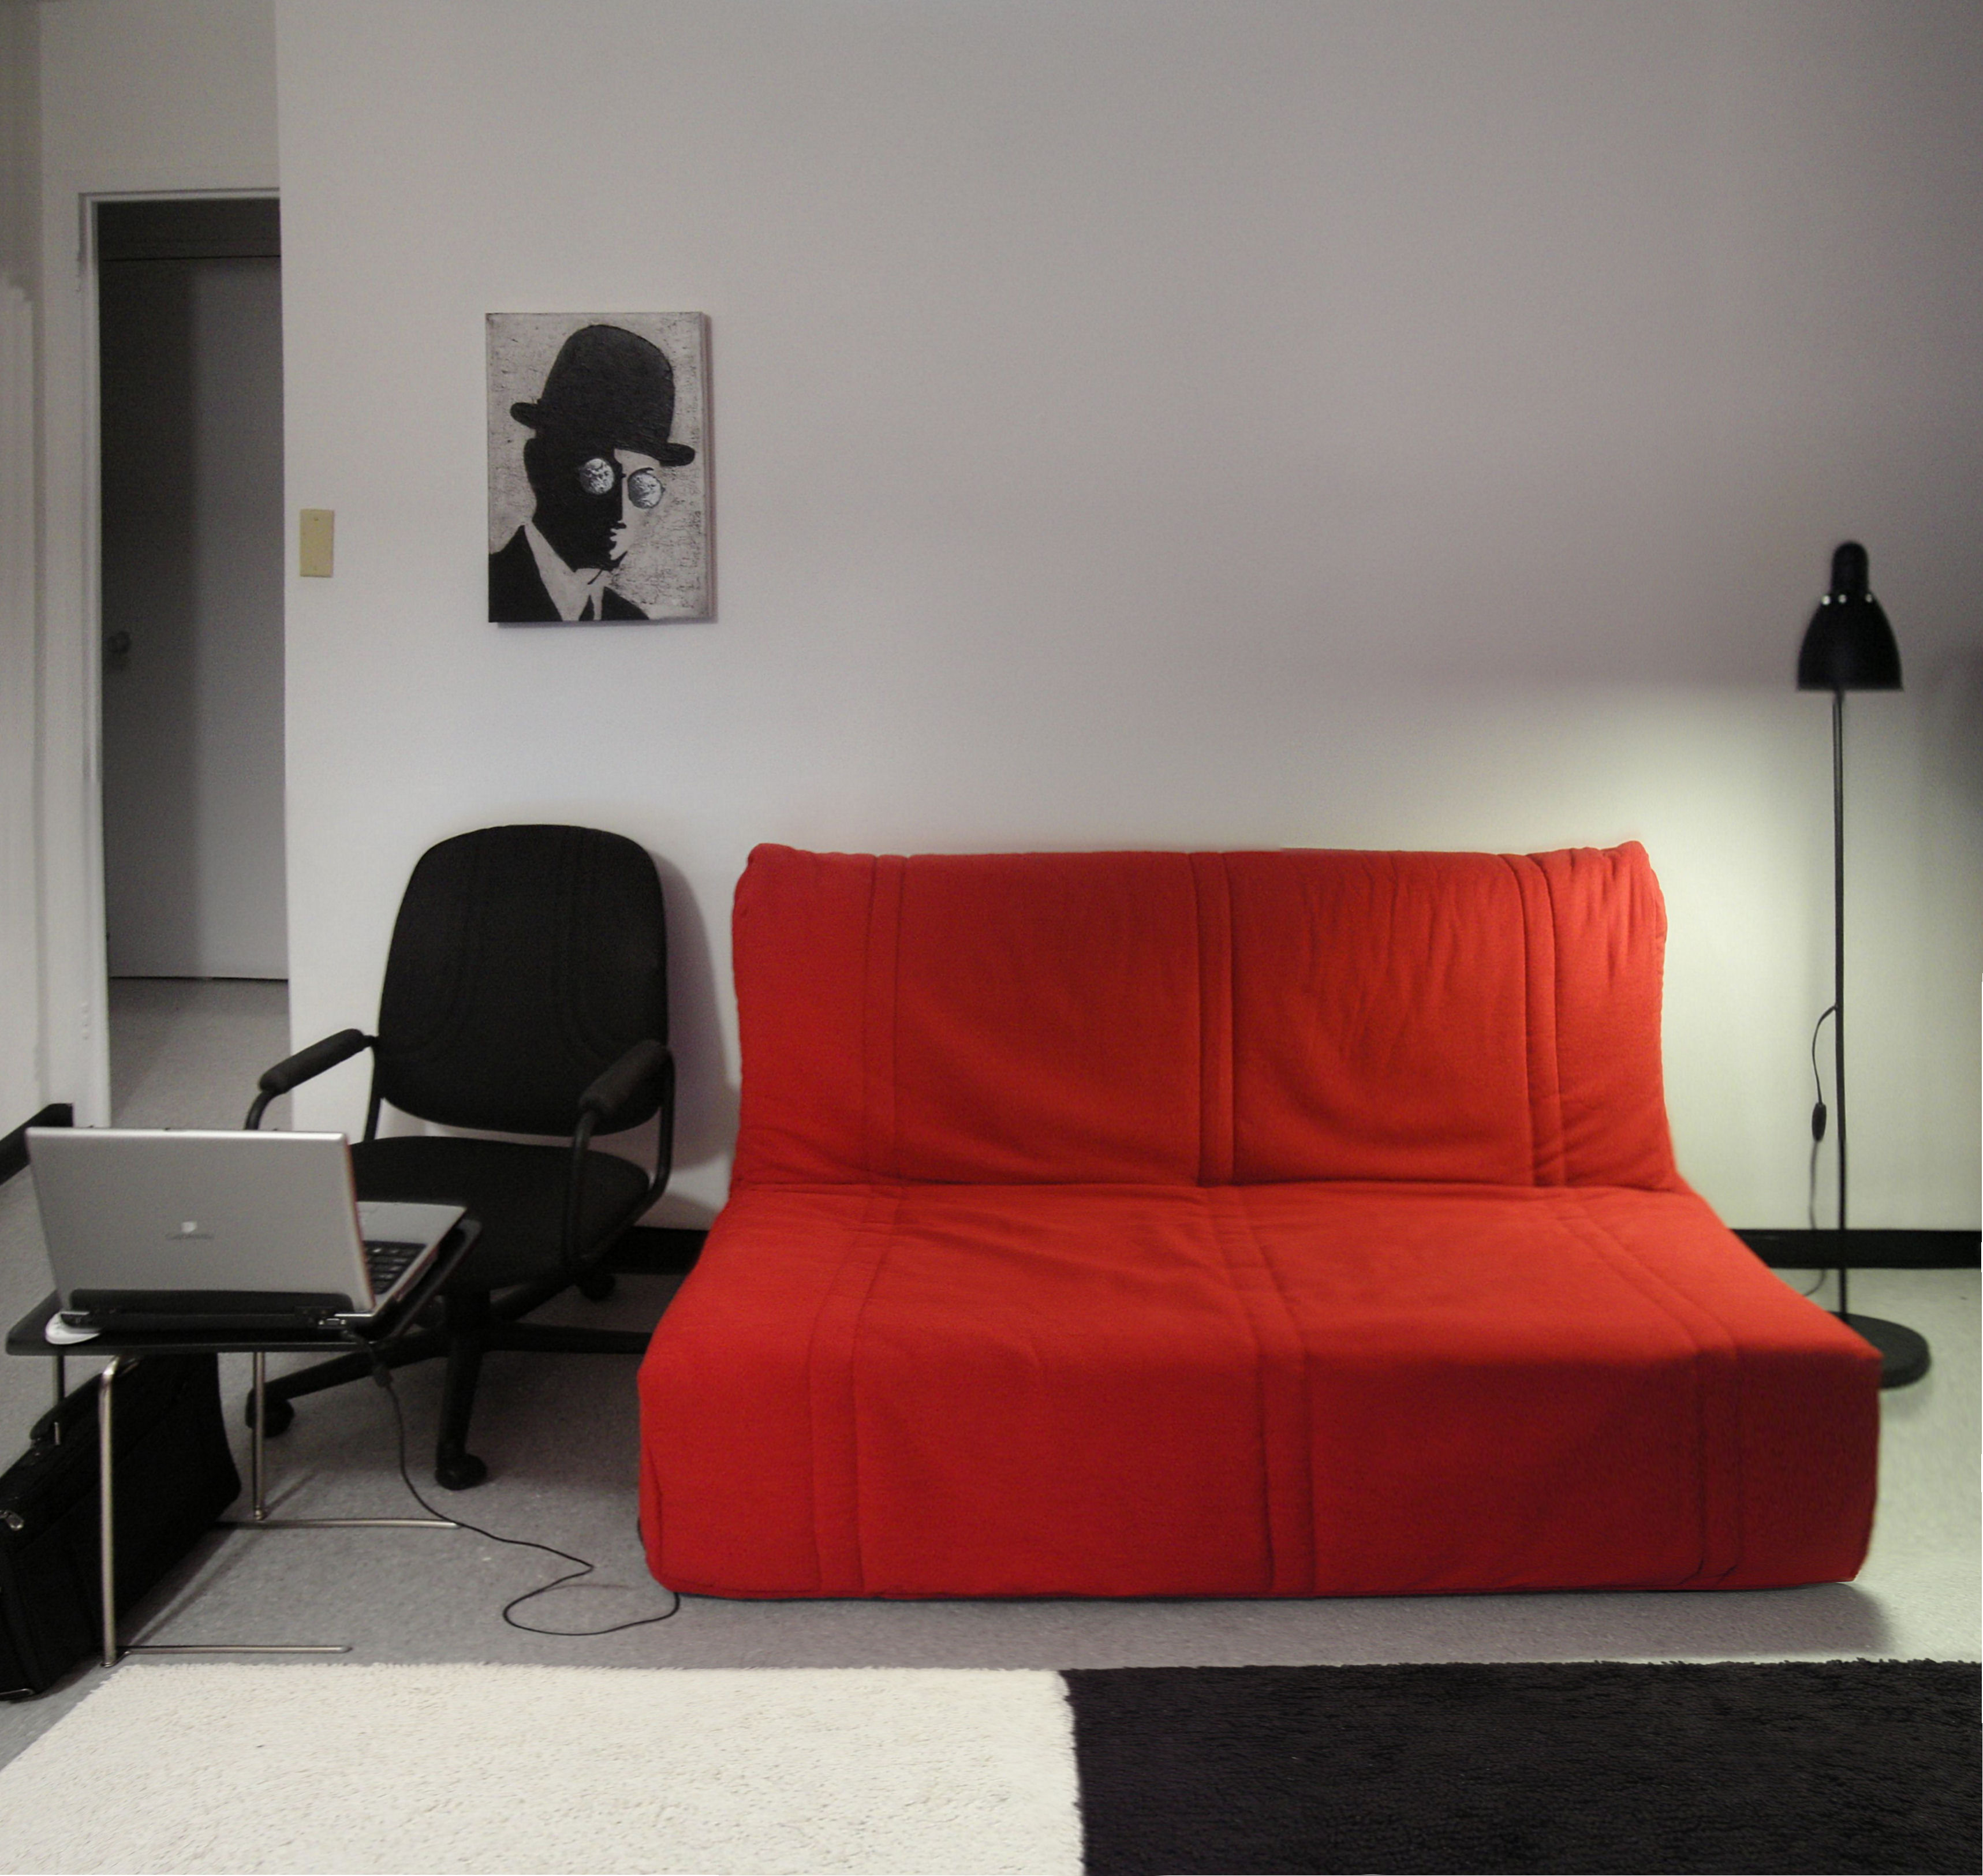

distance: 226.780517578125


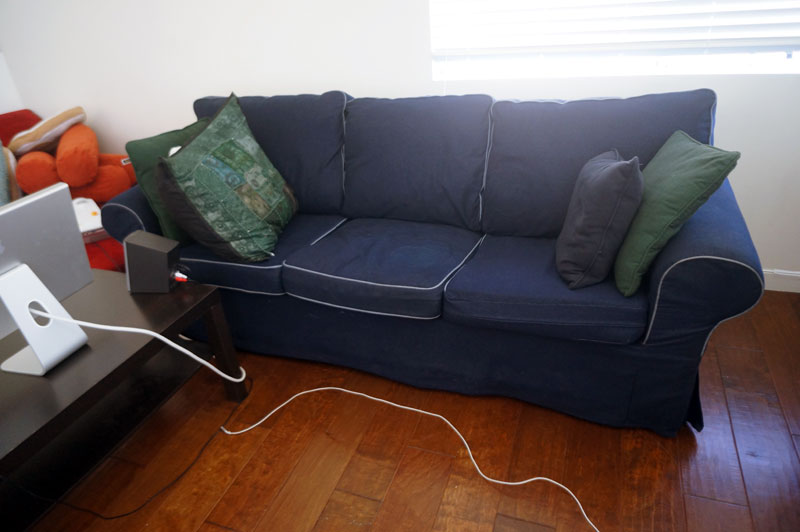

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


distance: 164.7150115966797


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


distance: 382.6841735839844


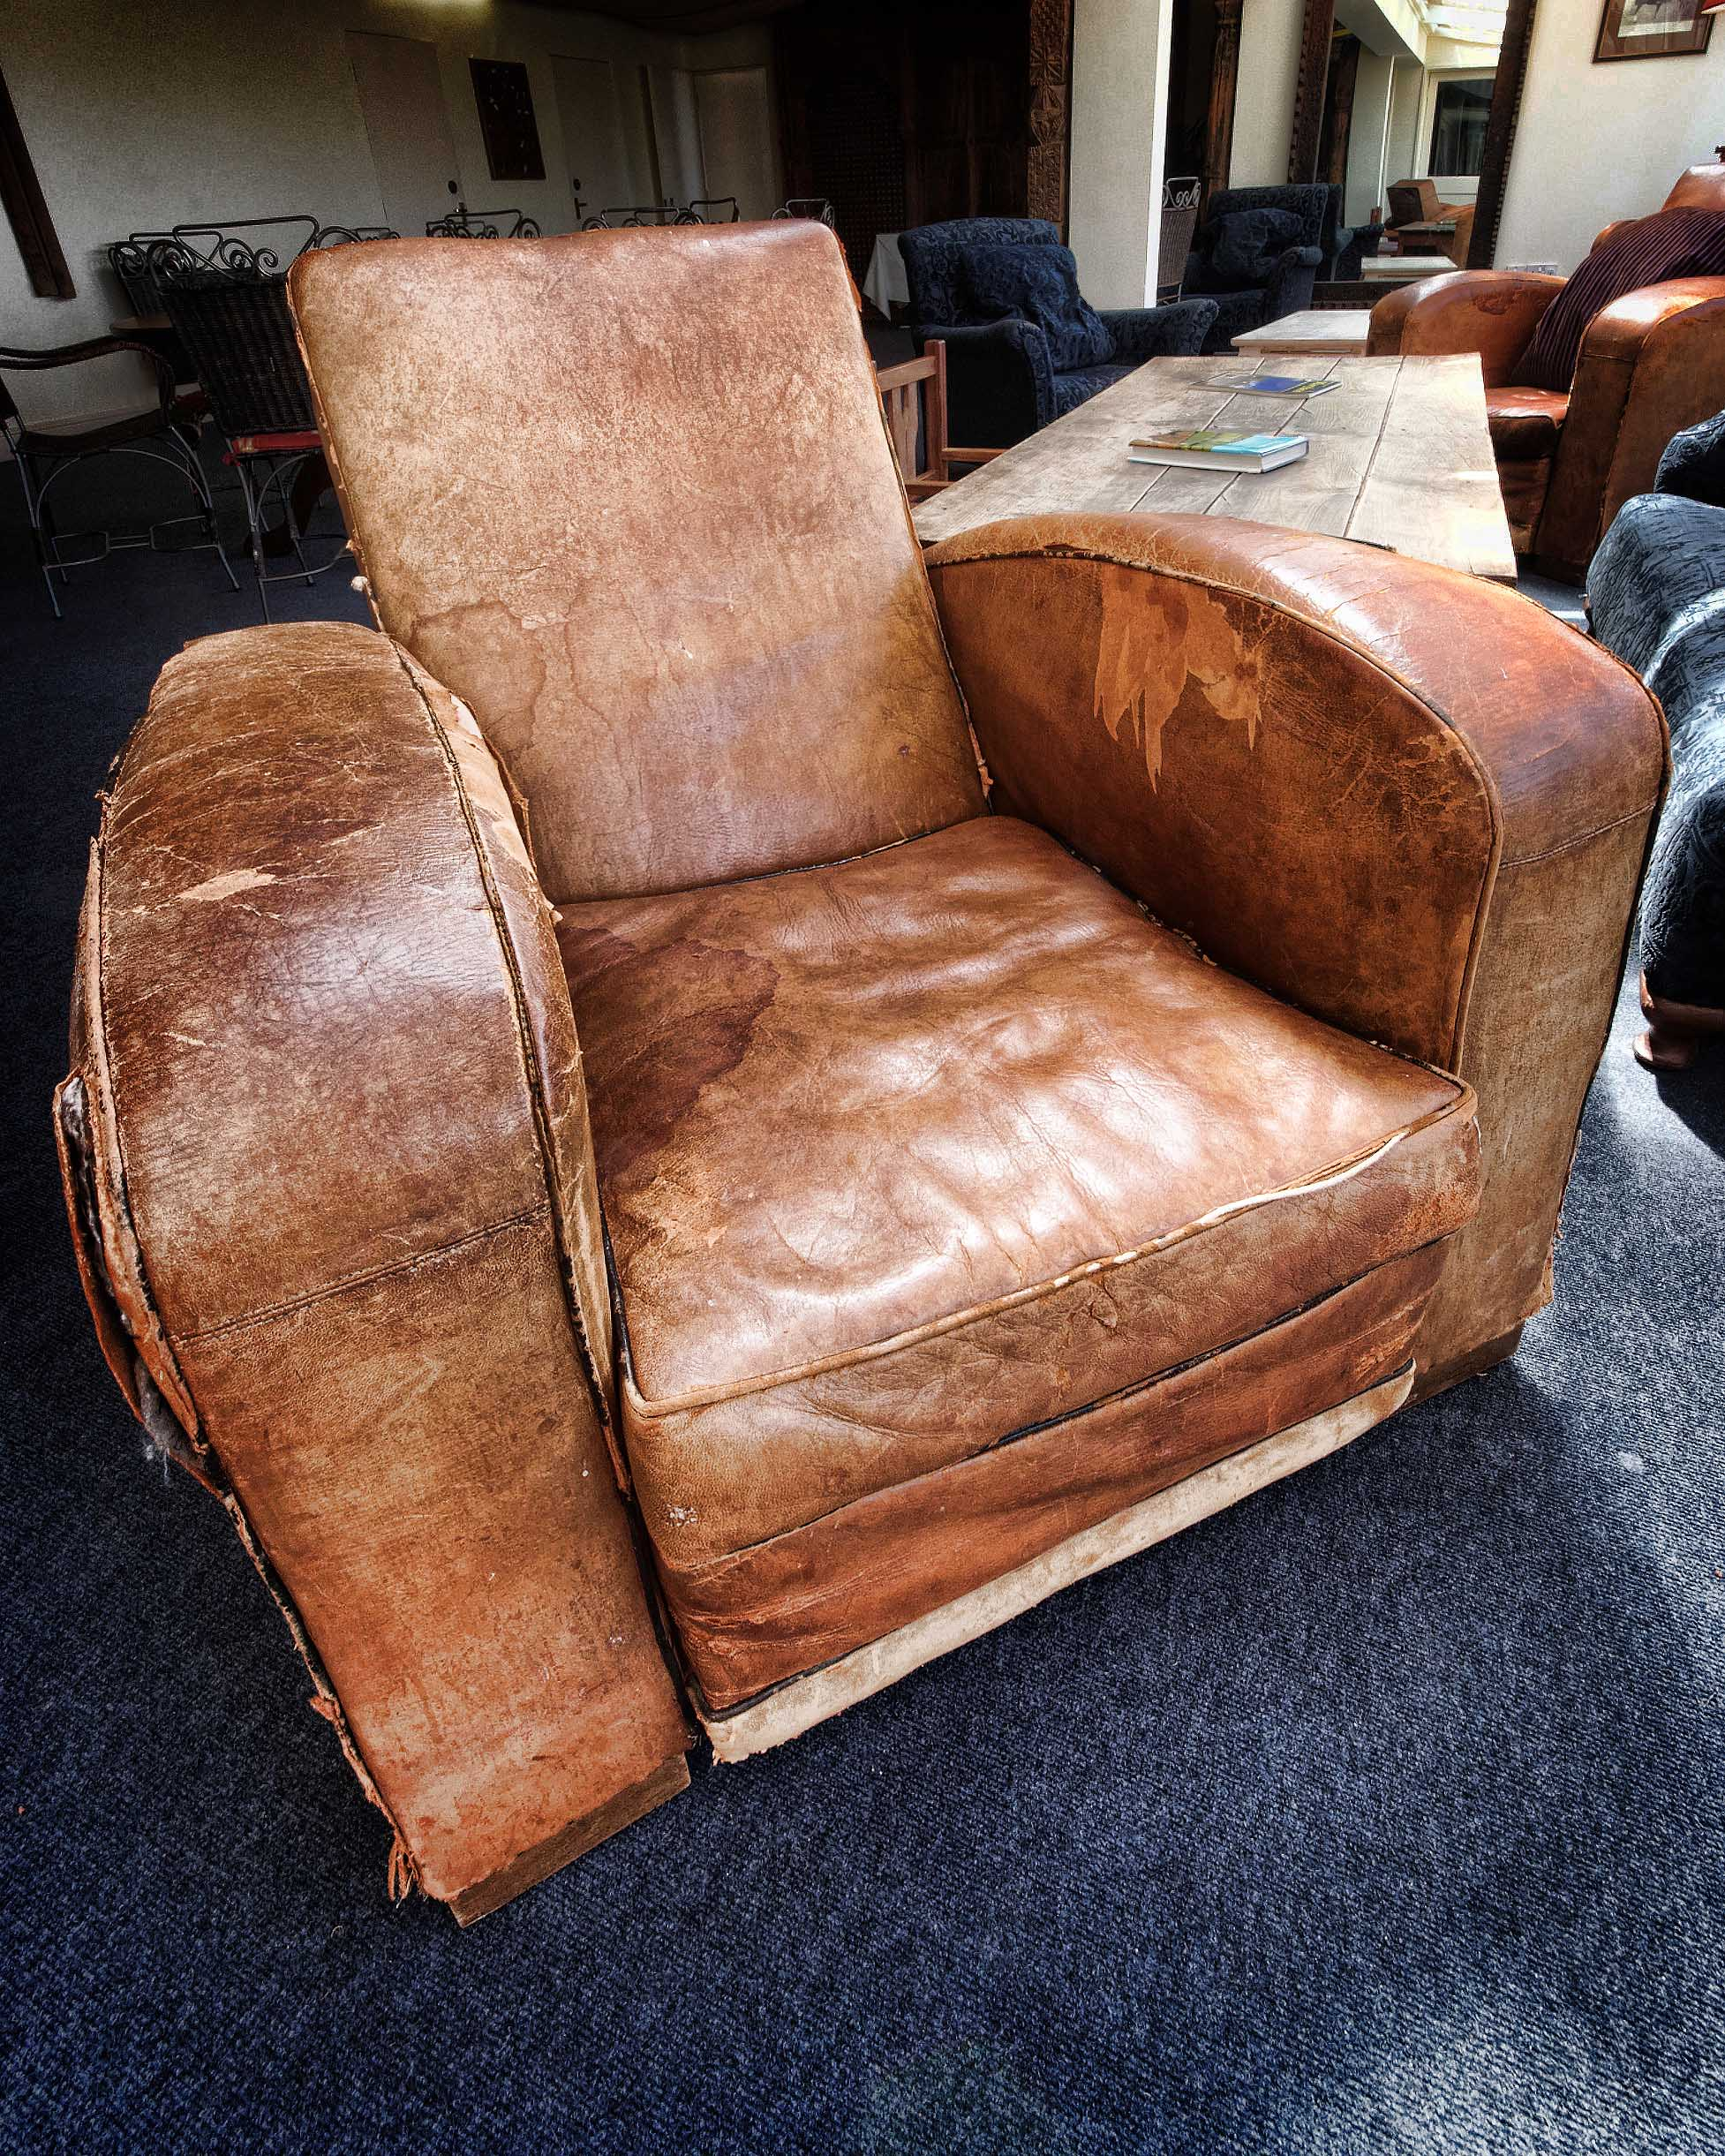

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [75]:
gen_pairs(5,couch_feature_matrix,couch_images)

In [77]:
c.NotebookApp.iopub_data_rate_limit

NameError: name 'c' is not defined